In [1]:
#Enter your path of dataset from google drive  
import scipy.io as sio
from matplotlib import pyplot as plt
import numpy as np 
from scipy import misc
import cv2
from math import sqrt
from numpy import ndarray

GOOGLE_COLAB = True

path = ""
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/')
    path = "/content/drive/My Drive/"

dataset = path + "data.mat" 

#Enter path of your test image
test_image=path+"uu.jpg"
mat_contents = sio.loadmat(dataset)
mat_contents
images = mat_contents['images']
label = mat_contents['C']
images.shape


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


(50, 3072)

In [0]:
#IMAGE RESHAPING IN STANDARD FORM
images= np.transpose(images)
images.shape
im = np.reshape(images, [ 32, 32, 3, -1], order="F")

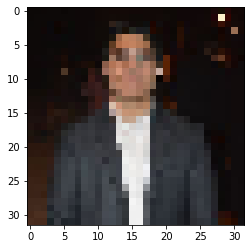

In [4]:
#Preprocessing the Test Image
my_image=(cv2.imread(test_image))
my_image=cv2.cvtColor(my_image, cv2.COLOR_RGB2BGR)
my_image=cv2.resize(my_image,(32,32))
plt.imshow(my_image)

In [5]:
#MAKING VOTING ARRAY AS WELL AS 10 CLASS ARRAY
label_names=[]
xx=1
while(xx<len(label)):
  label_names.append(label[xx])
  xx=xx+5
Voting_Array=np.zeros((1,10))      #Will take the maximum of votes from this array at the end of program
print(Voting_Array)
print(label_names)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[array([array(['morgan freeman'], dtype='<U14')], dtype=object), array([array(['ahsan khan'], dtype='<U10')], dtype=object), array([array(['tom cruise'], dtype='<U10')], dtype=object), array([array(['sanam baloch'], dtype='<U12')], dtype=object), array([array(['meryl streep'], dtype='<U12')], dtype=object), array([array(['bilawal bhutto'], dtype='<U14')], dtype=object), array([array(['Viola Davis'], dtype='<U11')], dtype=object), array([array(['aishwarya rai'], dtype='<U13')], dtype=object), array([array(['fawad khan'], dtype='<U10')], dtype=object), array([array(['mahira khan'], dtype='<U11')], dtype=object)]


In [0]:
#Calculating the Euclidean Distances of test Image with each Image present in the data 
distance_values=[]
my_image_vector = np.reshape(my_image,[-1], order="F")


    #Read your image here
my_image=(cv2.imread(test_image))
my_image=cv2.cvtColor(my_image, cv2.COLOR_RGB2BGR)
   
    #Resize your image
my_image=cv2.resize(my_image,(32,32))
    #Reshape your image as we reshape the image of dataset
my_image_vector = np.reshape(my_image,[-1], order="F")
for i in range(50):
        G = im[:,:,:,i]
        G = np.reshape(G,[-1], order="F")
        #Calculate Eucleadian distance between your image and dataset 
        my_distance=np.sqrt(np.sum(np.square(G-my_image_vector)))
        #my_distance=np.linalg.norm(G-my_image_vector)
        distance_values.append(my_distance)
    

518.3377277412865
FOR K=1 , THE INPUT PICTURE BEST RESEMBLES WITH THE Picture No 7  Of the Given Data Set
[array(['ahsan khan'], dtype='<U10')]


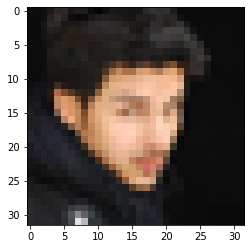

In [7]:
# Write code for 1 NN
#Find min distance
#Fine at which point min value exists
minimum_value_index=0;
minpos = distance_values.index(min(distance_values)) 
minimum_value_index=minpos;
print(min(distance_values))
print('FOR K=1 , THE INPUT PICTURE BEST RESEMBLES WITH THE Picture No ' + str(minpos) + '  Of the Given Data Set')
print( label[minpos])
plt.imshow(im[:,:,:,minpos])

In [8]:
#3 NN
#Write code for 3 NN
#Find 3 min distances
#Find their instances
#hint: Use for Loop
K=3
smallest_distance_index=0
#Voting_Array=np.zeros((1,10))       #Will take the maximum of votes from this array at the end of program
temp_array=distance_values[:]          #Creating Temporay Array which is modifed again and again in the below loop

for i in range(K):
  
  minpos = temp_array.index(min(temp_array))     #find smallest distance in the array
  
  if i==0:
    smallest_distance_index=minpos
  
  label_name_in_current_loop=label[minpos]       #find name of actor from label array
  voting_index = label_names.index(label_name_in_current_loop) # find index of that actor in label_names array (having 10 names only)
  Voting_Array[0,voting_index]=Voting_Array[0,voting_index]+1   #add a vote to that actor as resembling to my image
  
  
  print( 'In iteration' + str(i) '  minimum value is ')
  print(min(temp_array))
  temp_array[minpos]=max(temp_array)+1000
  
    

print(Voting_Array)


first minimum value is 
518.3377277412865
first minimum value is 
538.385549583196
first minimum value is 
539.0983212735873
[[0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]]


Tie Has Occured using this value of K
So the Closest Matching Picture with respect to Distance is Picture No 7  Of the Data Set
[array(['ahsan khan'], dtype='<U10')]


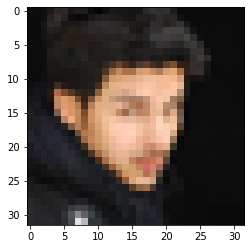

In [9]:
#Checking if We have Tie results or NOT
Max_vote = np.amax((Voting_Array)) 
Max_vote_index=np.argmax(Voting_Array)
Voting_Array[0,Max_vote_index]=0
Max_vote2 = np.amax((Voting_Array))
if Max_vote==Max_vote2:
  print('Tie Has Occured using this value of K')
  print('So the Closest Matching Picture with respect to Distance is Picture No ' + str(smallest_distance_index) + '  Of the Data Set')
  plt.imshow(im[:,:,:,smallest_distance_index])
  print(label[smallest_distance_index])
else:
  print('So the Closest Matching Picture with respect to Voting is Picture No ' + str(label_names[Max_vote_index]) + '  Of the Data Set')

In [10]:
#Write code for 5 NN
#Find 5 min distances
#Find their instances
#hint: Use for Loop

K=5
Voting_Array=np.zeros((1,10))       #Will take the maximum of votes from this array at the end of program
temp_array=distance_values[:]          #Creating Temporay Array which is modifed again and again in the below loop

for i in range(K):
  
  minpos = temp_array.index(min(temp_array))     #find smallest distance in the array
  label_name_in_current_loop=label[minpos]       #find name of actor from label array
  voting_index = label_names.index(label_name_in_current_loop) # find index of that actor in label_names array (having 10 names only)
  Voting_Array[0,voting_index]=Voting_Array[0,voting_index]+1   #add a vote to that actor as resembling to my image
  

  print('first minimum value is ')
  print(min(temp_array))
  temp_array[minpos]=max(temp_array)+1000
Voting_Array

first minimum value is 
518.3377277412865
first minimum value is 
538.385549583196
first minimum value is 
539.0983212735873
first minimum value is 
542.8075165286494
first minimum value is 
550.7758164625603


array([[1., 1., 0., 0., 0., 1., 0., 0., 0., 2.]])

In [11]:
#Checking if We have Tie results or NOT
Max_vote = np.amax((Voting_Array)) 
Max_vote_index=np.argmax(Voting_Array)
Voting_Array[0,Max_vote_index]=0
Max_vote2 = np.amax((Voting_Array))
if Max_vote==Max_vote2:
  print('Tie Has Occured using this value of K')
  print('So the Closest Matching Picture with respect to Distance is Picture No ' + str(smallest_distance_index) + '  Of the Data Set')
  plt.imshow(im[:,:,:,smallest_distance_index])
  print(label[smallest_distance_index])
else:
  print('So the Closest Matching Actor with respect to Voting is ' + str(label_names[Max_vote_index]) + '  Of the Data Set')


So the Closest Matching Actor with respect to Voting is [array(['mahira khan'], dtype='<U11')]  Of the Data Set
